In [1]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/uploaded-dataset/cleveland.data
/kaggle/input/heart-disease-uci/heart.csv


Dataset link: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [3]:
df = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### IDENTITYING MISSING DATA

Method 1: remove rows with missing values

Method 2: impute values for the missing features using statistical measures like mean, median etc

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
df['ca'].unique()

array([0, 2, 1, 3, 4])

#### FORMAT DATA PART 1: dealing with missing values

1. check the no. of rows with  wierd values (if no. of rows is less with missing values , then we can remove it from the dataset)

In [8]:
X = df.drop('target', axis = 1).copy()
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [9]:
y= df['target'].copy()
y.head()
print(y.unique())

[1 0]


#### FORMAT DATA PART 2: dealing with categorical data

One hot encoding is used

In [10]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_0,cp_1,cp_2,cp_3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,0,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,0,2,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,2,0,1,0,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,0,1,0,0
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,0,0,0


In [11]:
X_encoded = pd.get_dummies(X, columns=['cp','restecg','slope','thal']).head()
X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,...,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,0,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,0,...,0,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,1,0,0,0,1,0,0,1,0


#### TRAINING DECISION TREE CLASSIFIER

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=42)
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(x_train, y_train)

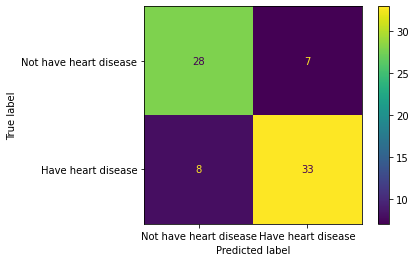

In [13]:
plot_confusion_matrix(clf_dt, x_test, y_test, display_labels=['Not have heart disease', 'Have heart disease'])

#### PRUNING PART 1

Pruning prevents classifier from overfitting. Thereby, improving the results. The parameter responsible for pruning is 'alpha', which suggest how much little or more pruning is done depending on its value. One way to find an optimal value for 'alpha' is by plotting accuracy vs different alpha values.

In [14]:
path = clf_dt.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas , impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1]  #ignoring the last value because the last value corresponds to purning the tree completely , leaving just root node behind.

clf_dts= []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42 , ccp_alpha= alpha)
    clf = clf.fit(x_train, y_train)
    clf_dts.append(clf)
    

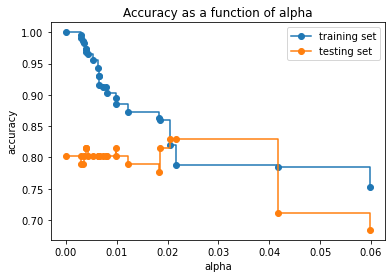

In [15]:
#plot the accuracy as function of alpha for both training and testing sets

train_scores = [clf_dt.score(x_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(x_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel("accuracy")
ax.set_title("Accuracy as a function of alpha")
ax.plot(ccp_alphas, train_scores, marker = 'o', label ='training set', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_scores, marker = 'o', label ='testing set', drawstyle = 'steps-post')
ax.legend()
plt.show()

The best value for alpha= 0.002. But how can we make sure that this value is best, because if the training or testing set is chnaged , alpha value might change as well. 

#### PRUNING PART 2

Here, we will use cross validation method to, train the classifier on different training set (which is subset of the actual dataset), so to get the optimal value of alpha+ optimal training dataset

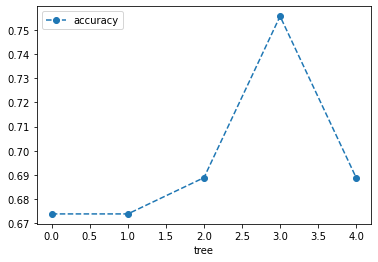

In [16]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.002)
scores = cross_val_score(clf_dt, x_train, y_train, cv= 5)
df = pd.DataFrame(data ={'tree':range(5), 'accuracy':scores})

df.plot(x='tree', y= 'accuracy', marker='o', linestyle ='--')

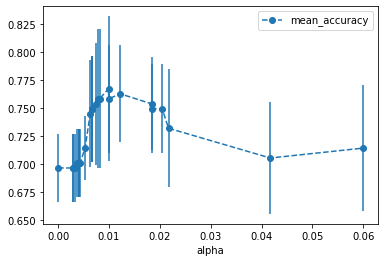

In [17]:
alpha_loop_values = []

for alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    scores = cross_val_score(clf_dt, x_train, y_train, cv=5)
    alpha_loop_values.append([alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(data=alpha_loop_values , columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha' , y='mean_accuracy', yerr='std', marker='o', linestyle='--')

Best alpha value is around 0.01

In [18]:
optimal_alpha = alpha_results[(alpha_results['alpha']>0.0034) & (alpha_results['alpha']<0.004)]['alpha']
print(optimal_alpha)
optimal_alpha = float(optimal_alpha)

4    0.003636
Name: alpha, dtype: float64


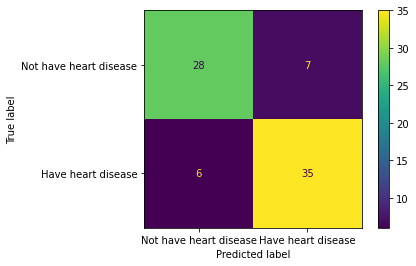

In [19]:
#Final classification
clf_pruned = DecisionTreeClassifier(random_state=42 , ccp_alpha= 0.03)
clf_pruned = clf_pruned.fit(x_train, y_train)
plot_confusion_matrix(clf_pruned, x_test, y_test, display_labels=['Not have heart disease', 'Have heart disease'])


[Text(279.0, 453.0, 'ca <= 0.5\ngini = 0.496\nsamples = 227\nvalue = [103, 124]\nclass = Yes HD'),
 Text(139.5, 271.8, 'thal <= 2.5\ngini = 0.371\nsamples = 134\nvalue = [33, 101]\nclass = Yes HD'),
 Text(69.75, 90.59999999999997, 'gini = 0.175\nsamples = 93\nvalue = [9, 84]\nclass = Yes HD'),
 Text(209.25, 90.59999999999997, 'gini = 0.485\nsamples = 41\nvalue = [24, 17]\nclass = No HD'),
 Text(418.5, 271.8, 'cp <= 0.5\ngini = 0.372\nsamples = 93\nvalue = [70, 23]\nclass = No HD'),
 Text(348.75, 90.59999999999997, 'gini = 0.105\nsamples = 54\nvalue = [51, 3]\nclass = No HD'),
 Text(488.25, 90.59999999999997, 'gini = 0.5\nsamples = 39\nvalue = [19, 20]\nclass = Yes HD')]

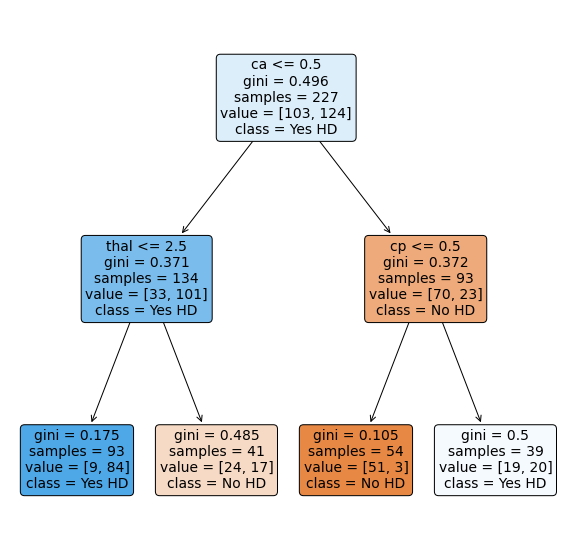

In [20]:
plt.figure(figsize=(10,10))
plot_tree(clf_pruned, 
         filled =True,
         rounded =True,
         class_names=['No HD', 'Yes HD'],
         feature_names=X.columns)